# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## "Emotionen & Entscheidung - Sentiment & Topic Analyse der Bundestagsdebatten zur Pandemie"

*Autorin: Paula Hofmann*

## 0. Vorbereitende Maßnahmen

### 1.1 Packages installieren

In [1]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
import matplotlib.dates as mdates 
import matplotlib.font_manager as fm

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen

# Import NLP Packages
import nltk
import spacy

In [2]:
# Methoden aus eigenem Modul importieren
import Sentiment_Methods

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paulahofmann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paulahofmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paulahofmann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 9.3 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1.2 Datensätze einlesen und vorbereiten
In diesem Abschnitt werden unsere beiden Datensätze mit politischen Reden aus der 19. und 20. Wahlperiode im Kontext von Corona sowie den zuvor identifizierten Sentiments eingelesen. Zusätzlich werden Daten zur Corona-Pandemie, die vom Robert Koch-Institut auf GitHub frei zur Verfügung gestellt werden, ebenfalls eingelesen.

In [4]:
# Periode 2019 (24.10.2017-26.09.21): Reden im Kontext von Corona + Sentiment
df_sentiment19 = pd.read_csv("/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/3. Semester/Soziologie/Data_Analysis/modellorginal19.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

# Legislaturperiode 2020 (24.10.2017-26.09.21): Reden im Kontext von Corona + Sentiment 
df_sentiment20 = pd.read_csv("/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/3. Semester/Soziologie/Data_Analysis/modellorginal20.csv")
df_sentiment20['date'] = pd.to_datetime(df_sentiment20['date'])
df_sentiment20.sort_values(by='date')

Unnamed: 0                                               satz  \
705         744  Sie, sehr geehrte Kolleginnen und Kollegen von...   
726         765  Um vor die vierte Welle zu kommen, müssen wir ...   
727         766                              Und das schaffen wir.   
728         767  Das haben wir im Sommer schon geschafft, und w...   
729         768               Niedergelassene Ärzte werden impfen.   
..          ...                                                ...   
893         942  Sie sind verantwortlich für diesen beispiellos...   
892         941  Nach einer jahrzehntelangen Vernachlässigung d...   
891         940  Im zweiten Jahr hintereinander\n              ...   
911         960  Die Regierung aus Union und SPD hat unter dem ...   
914         963  Der DOSB und die AfD haben früh gesagt: Der Sp...   

              id  period       date            name party  redner_id  \
705   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
726   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
727   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
728   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
729   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
..           ...     ...        ...             ...   ...        ...   
893  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
892  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
891  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
911  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
914  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   

                    discussion_title  \
705  Tagesordnungspunkt 1 2021-11-18   
726  Tagesordnungspunkt 1 2021-11-18   
727  Tagesordnungspunkt 1 2021-11-18   
728  Tagesordnungspunkt 1 2021-11-18   
729  Tagesordnungspunkt 1 2021-11-18   
..                               ...   
893  Tagesordnungspunkt 6 2023-03-30   
892  Tagesordnungspunkt 6 2023-03-30   
891  Tagesordnungspunkt 6 2023-03-30   
911  Tagesordnungspunkt 6 2023-03-30   
914  Tagesordnungspunkt 6 2023-03-30   

                                                  text  \
705  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
726  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
727  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
728  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
729  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
..                                                 ...   
893  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
892  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
891  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
911  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
914  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   

                                        tokenized_text  \
705  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
726  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
727  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
728  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
729  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
..                                                 ...   
893  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
892  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
891  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
911  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
914  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   

                                                tokens  \
705  ['Union', 'allerdings', 'verfassungsrechtlich'...   
726  ['vierte', 'Welle', 'kommen', 'müssen', 'tägli...   
727                                       ['schaffen']   
728  ['Sommer', 'schon', 'geschafft', 'brauchen', '...   
729             ['Niedergelassene', 'Ärzte', 'impfen']   
..                                                 ...   
893  ['verantwortl

In [5]:
# Durch Betrachtung des df wurde festgestellt, dass bei einigen Politikern die Partei nicht angegeben ist, dieses wird nun ergänzt 

# Definieren eines dictionary, um Politikernamen den aktuell "unbekannten" Parteien zuzuordnen.

party_mapping = {
    'Olaf Scholz': 'SPD',
    'Horst Seehofer': 'CDU/CSU',
    'Annegret Kramp-Karrenbauer': 'CDU/CSU',
    'Dr. Volker Wissing': 'FDP',
    'Michael Kretschmer': 'CDU/CSU',
    'Dr. Janosch Dahmen': 'BÜNDNIS 90/DIE GRÜNEN',
    'Svenja Schulze': 'SPD'
}

# Update der df um fehlende Informationen
df_sentiment20['party'] = df_sentiment20['name'].map(party_mapping).fillna(df_sentiment20['party'])
df_sentiment19['party'] = df_sentiment19['name'].map(party_mapping).fillna(df_sentiment19['party'])

In [18]:
# Erstellen eines merged Dataframes 
# Corona Pandemie erstreckt sich über zwei Wahlperiode, zur einfacheren Vergleichbarkeit werden datensätze zusammengeführt

merged_sentiment = pd.concat([df_sentiment19, df_sentiment20], ignore_index=True)


In [7]:
#Einlesen der Corona Fallzahlen für den Zeitraum 25.02.2020-21.04.2023
url="https://raw.githubusercontent.com/robert-koch-institut/COVID-19_7-Tage-Inzidenz_in_Deutschland/main/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv"
corona_fallzahlen = pd.read_csv(url,parse_dates=[0])

#Ändern "meldedatum" zu "date"
corona_fallzahlen.rename(columns={'Meldedatum': 'date'}, inplace=True)
corona_fallzahlen['date'] = pd.to_datetime(corona_fallzahlen['date'])
corona_fallzahlen.sort_values(by='date')

date Altersgruppe  Bevoelkerung  Faelle_gesamt  Faelle_neu  \
0    2020-01-03        00-04       3975333              0           0   
1    2020-01-03          00+      83237124              1           1   
2    2020-01-03        05-14       7631602              0           0   
3    2020-01-03        15-34      18795840              0           0   
4    2020-01-03        35-59      28403806              0           0   
...         ...          ...           ...            ...         ...   
9451 2023-09-14          00+      83237124       38475022         989   
9452 2023-09-14        05-14       7631602        4497212          22   
9453 2023-09-14        15-34      18795840       11184338         179   
9454 2023-09-14        35-59      28403806       14971508         313   
9456 2023-09-14          80+       6111655        1643001         190   

      Faelle_7-Tage  Inzidenz_7-Tage  
0                 0              0.0  
1                 0              0.0  
2                 0              0.0  
3                 0              0.0  
4                 0              0.0  
...             ...              ...  
9451           7324              8.8  
9452            104              1.4  
9453           1184              6.3  
9454           2031              7.2  
9456           1744             28.5  

[9457 rows x 7 columns]

In [8]:
# Filtern damit nur Fälle auf Landesebene unabhängig von der Altersgruppe vorhanden sind
# (=> Merkamle ID_ Altersgruppe = 00+)
corona_fallzahlen_gesamt = corona_fallzahlen[corona_fallzahlen["Altersgruppe"]== "00+"]
corona_fallzahlen_gesamt

date Altersgruppe  Bevoelkerung  Faelle_gesamt  Faelle_neu  \
1    2020-01-03          00+      83237124              1           1   
8    2020-01-04          00+      83237124              1           0   
15   2020-01-05          00+      83237124              1           0   
22   2020-01-06          00+      83237124              1           0   
29   2020-01-07          00+      83237124              1           0   
...         ...          ...           ...            ...         ...   
9423 2023-09-10          00+      83237124       38470397         151   
9430 2023-09-11          00+      83237124       38470478          81   
9437 2023-09-12          00+      83237124       38472472        1994   
9444 2023-09-13          00+      83237124       38474033        1561   
9451 2023-09-14          00+      83237124       38475022         989   

      Faelle_7-Tage  Inzidenz_7-Tage  
1                 0              0.0  
8                 0              0.0  
15                0              0.0  
22                0              0.0  
29                0              0.0  
...             ...              ...  
9423           7129              8.6  
9430           7129              8.6  
9437           7667              9.2  
9444           7679              9.2  
9451           7324              8.8  

[1351 rows x 7 columns]

## 1. Fragestellung
Die Sentimentanalyse politischer Reden während der COVID-19-Pandemie konzentriert sich auf zwei Hauptfragen: Erstens, ob eine Verbindung zwischen den Corona-Fallzahlen und der Sentimententwicklung in politischen Reden besteht, und zweitens, welche Schlüsselthemen während Pandemiehochphasen und Sentimenthöhepunkten relevant waren?

Um diese Fragen zu klären, wurde zunächst eine Korrelationsanalyse zwischen politischen Reden und epidemiologischen Daten durchgeführt, um mögliche Zusammenhänge zu ermitteln. Anschließend erfolgte die Analyse der Hochphasen der Pandemie und Sentimenthöhepunkte, um wichtige politische Themen und deren Einfluss auf die Sentiments herauszuarbeiten. Diese Untersuchung ermöglicht nicht nur das Verständnis politischer Einflüsse auf die öffentliche Meinung und Reaktionen auf die Pandemie, sondern auch die Identifikation der Themen, die die politische Agenda in Krisenzeiten beeinflusst haben.

## 2. Deskriptive Analyse

### 2.1 Analyse der Coronafallzahlen

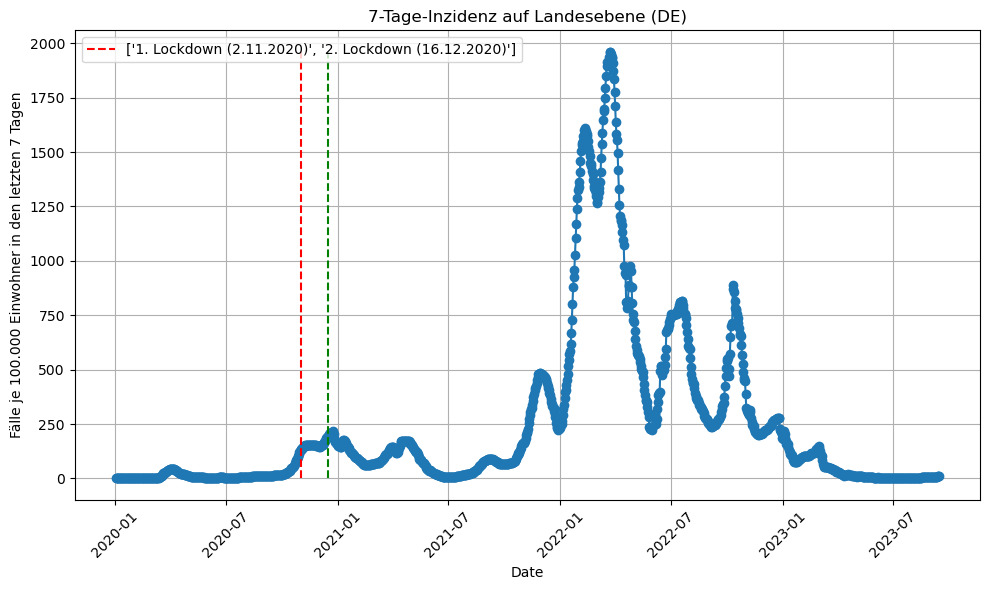

In [39]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen)')
plt.grid(True)
plt.xticks(rotation=45)

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['1. Lockdown (2.11.2020)', '2. Lockdown (16.12.2020)'])

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### 2.2 Sentiment Analyse

In [30]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def plot_most_frequent_ngrams(df, num_most_common=10):
    # Get the tokens from the DataFrame
    tokens = list(df['cleaned_text'].values)

    # Define your custom stopwords list
    custom_stopwords = ['Bündnis 90 Grünen', 'CDU', 'CSU-Fraktion','nicht','Bündnis','CSU',' ','-','zwei','Jahre','Jahren',"90","Grünen","Bündnis"]

    # Create a pattern that matches any of the custom stopwords
    stopwords_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in custom_stopwords) + r')\b')

    # Count unigrams
    unigram_counts = Counter()
    for text in tokens:
        unigrams = [word for word in re.split(r'\s+', text) if not stopwords_pattern.search(word)]
        unigram_counts.update(unigrams)

    # Count bigrams
    bigram_counts = Counter()
    for text in tokens:
        unigrams = [word for word in re.split(r'\s+', text) if not stopwords_pattern.search(word)]
        bigrams = [",".join(bigram) for bigram in zip(unigrams[:-1], unigrams[1:])]
        bigram_counts.update(bigrams)

    # Count trigrams
    trigram_counts = Counter()
    for text in tokens:
        unigrams = [word for word in re.split(r'\s+', text) if not stopwords_pattern.search(word)]
        trigrams = [",".join(trigram) for trigram in zip(unigrams[:-2], unigrams[1:-1], unigrams[2:])]
        trigram_counts.update(trigrams)

    # Get the most frequent tokens
    most_common_unigrams = unigram_counts.most_common(num_most_common)
    most_common_bigrams = bigram_counts.most_common(num_most_common)
    most_common_trigrams = trigram_counts.most_common(num_most_common)

    # Create the plot
    fig, axes = plt.subplots(3, 1, figsize=(8, 12))

    # Plot most frequent unigrams
    axes[0].barh([str(gram) for gram, count in most_common_unigrams], [count for gram, count in most_common_unigrams])
    axes[0].set_title('Most Frequent Unigrams')

    # Plot most frequent bigrams
    axes[1].barh([str(gram) for gram, count in most_common_bigrams], [count for gram, count in most_common_bigrams])
    axes[1].set_title('Most Frequent Bigrams')

    # Plot most frequent trigrams
    axes[2].barh([str(gram) for gram, count in most_common_trigrams], [count for gram, count in most_common_trigrams])
    axes[2].set_title('Most Frequent Trigrams')

    plt.tight_layout()
    plt.show()


#### 2.2.1 Nach Wahlperiode (Sentimentanalyse)

Zuerst wollen wir eine kurze deskriptive Analyse des Sentiments nach der jeweiligen Wahlperiode vornehmen. Dazu betrachten wir unsere zuvor eingelesenen Datensätze Wahlperiode 19. und Wahlperiode 20.

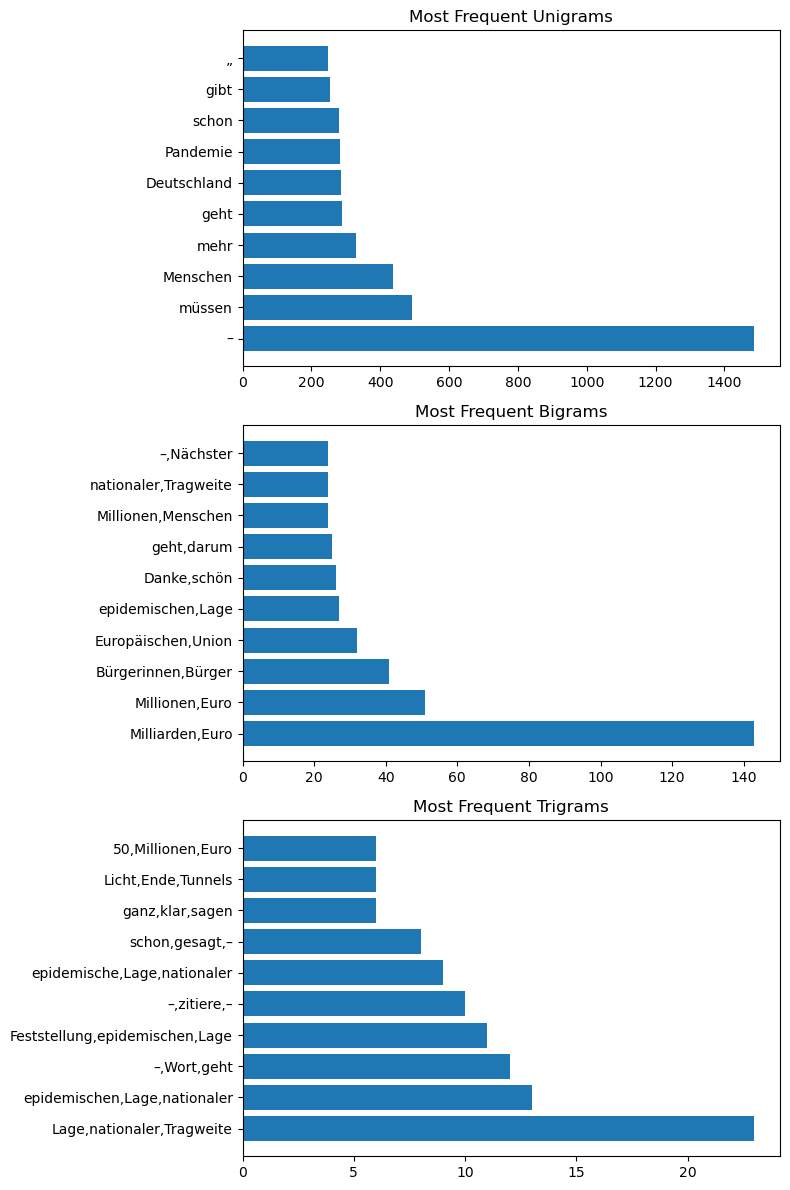

In [31]:
#Ausgabe der nGrams, um Stopwortliste zu überarbeiten
ngram_Stoppwortliste19 = plot_most_frequent_ngrams (df_sentiment19)

#ngram_Stoppwortliste19 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment19)


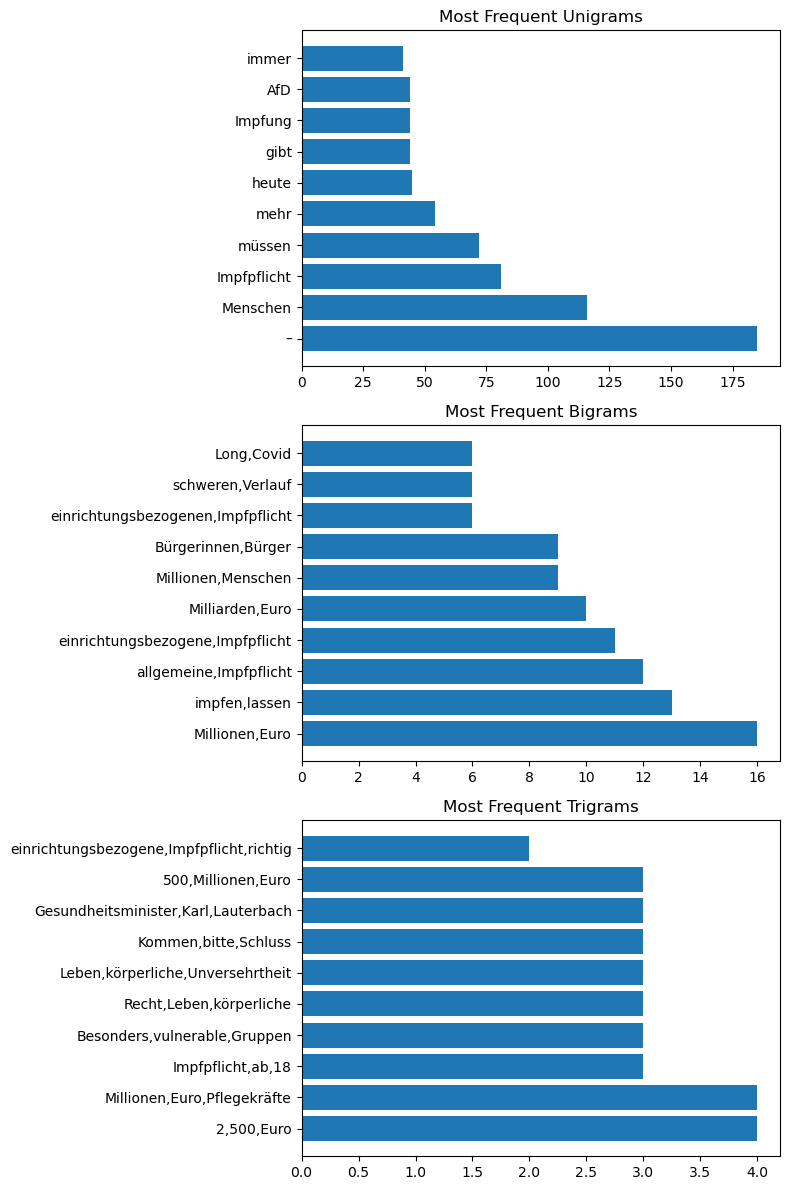

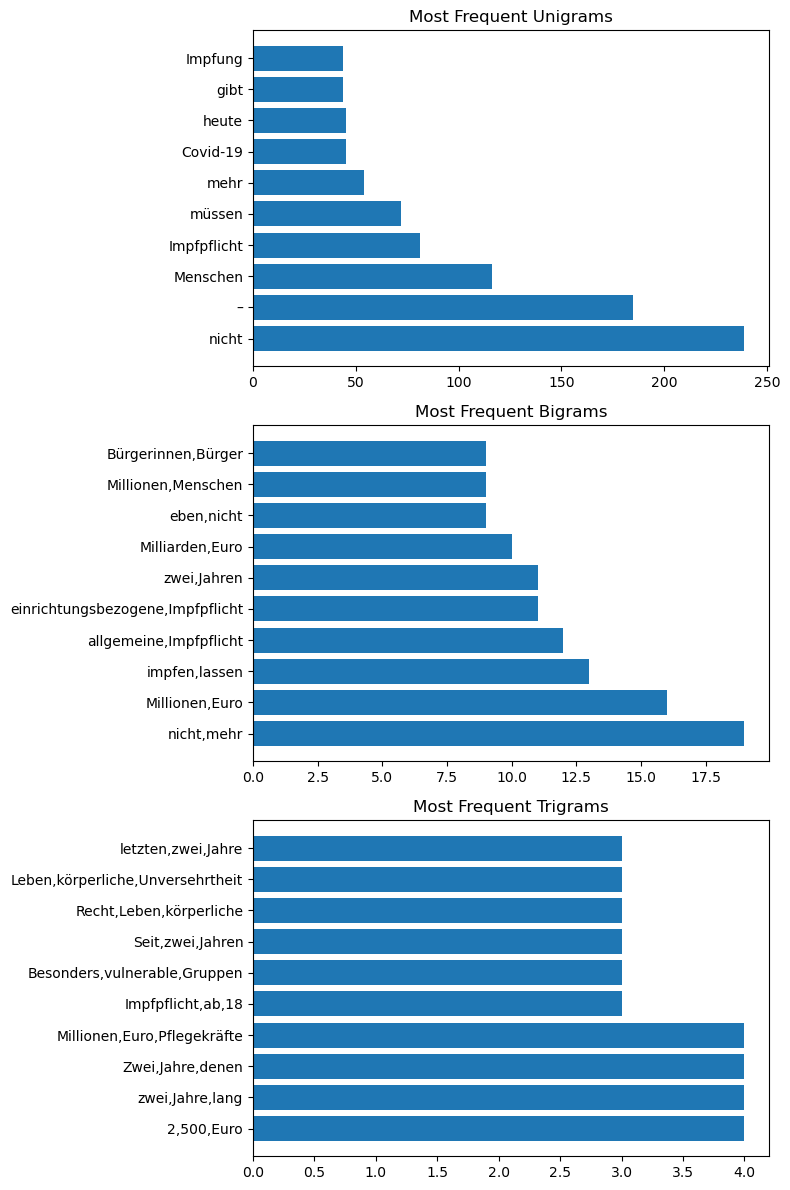

In [32]:
ngram_Stoppwortliste20 = plot_most_frequent_ngrams (df_sentiment20)

#ngram_Stoppwortliste20 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment20)

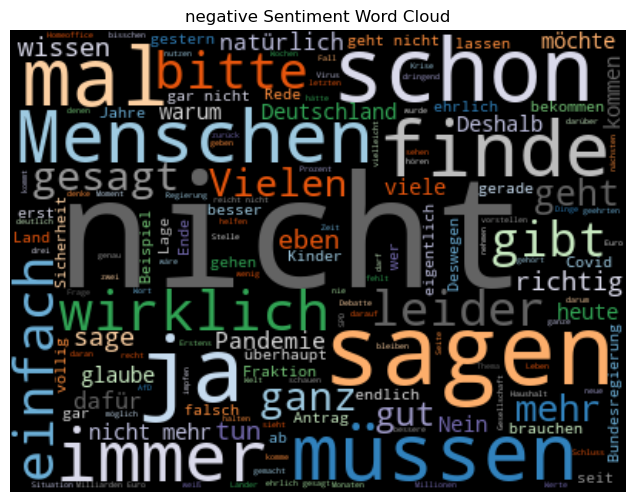

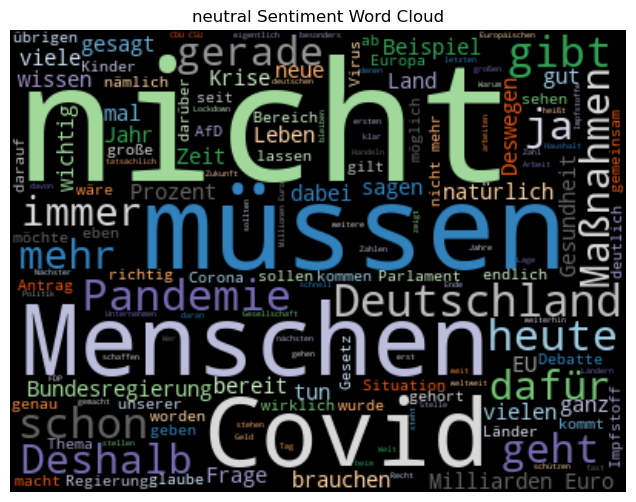

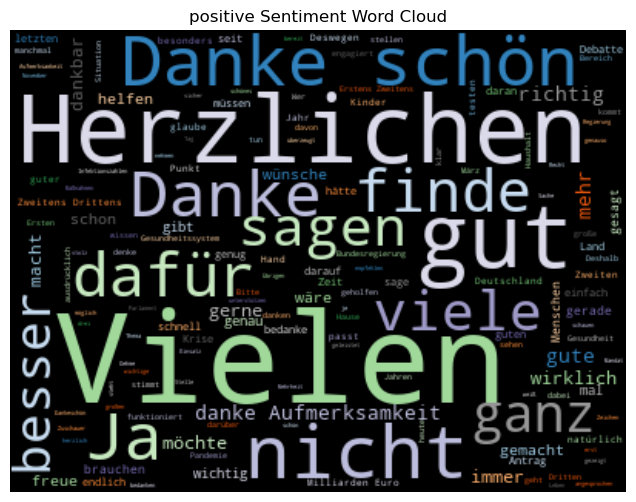

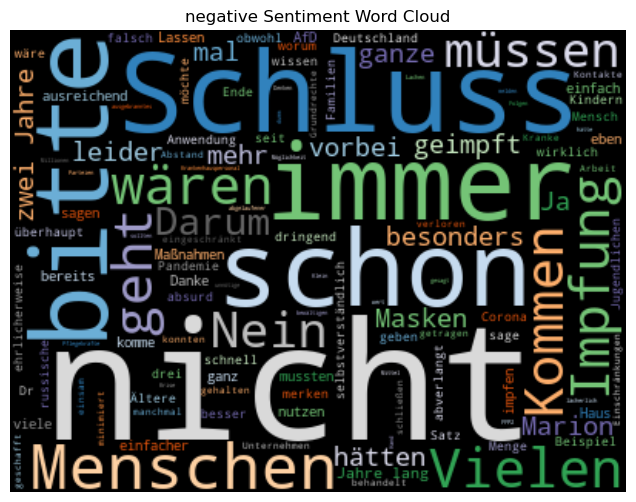

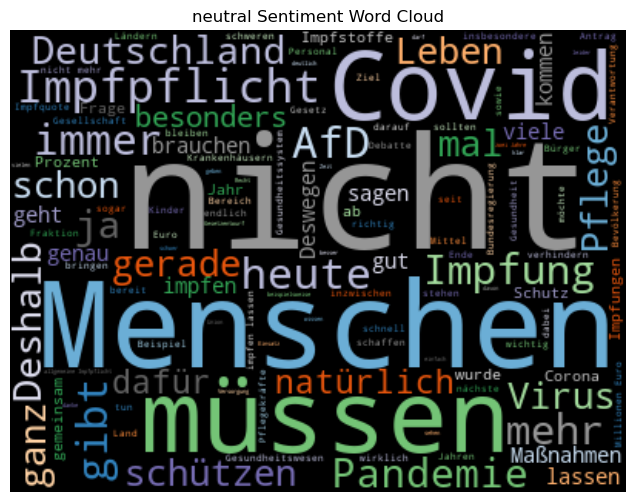

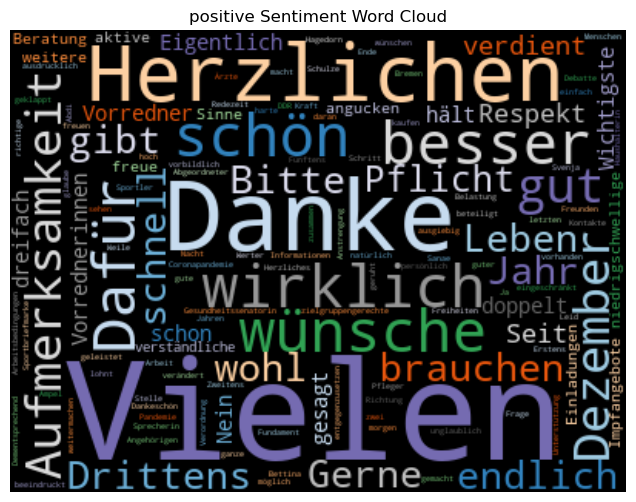

In [34]:
# Erstellen Wordclouds
Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment19)
Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment20)

#### 2.1.2 Sentiment Analyse Gesamt

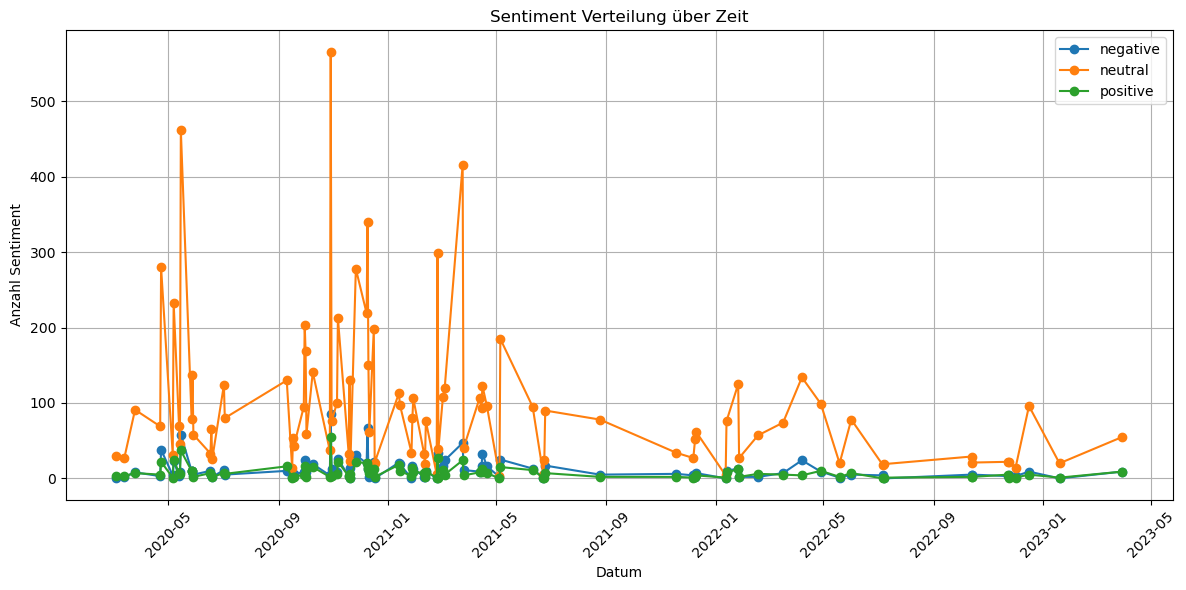

In [33]:
# Gruppieren des df nach datum und sentiment label, Häufigkeit der Sentimentkategorien zählen
sentiment_counts = merged_sentiment.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 6))

# Plotten je Sentiment 
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], marker='o', linestyle='-', label=sentiment)

# Plotaussehen anpassen
plt.title('Sentiment Verteilung über Zeit')
plt.xlabel('Datum')
plt.ylabel('Anzahl Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Plot anzeigen
plt.tight_layout()
plt.show()

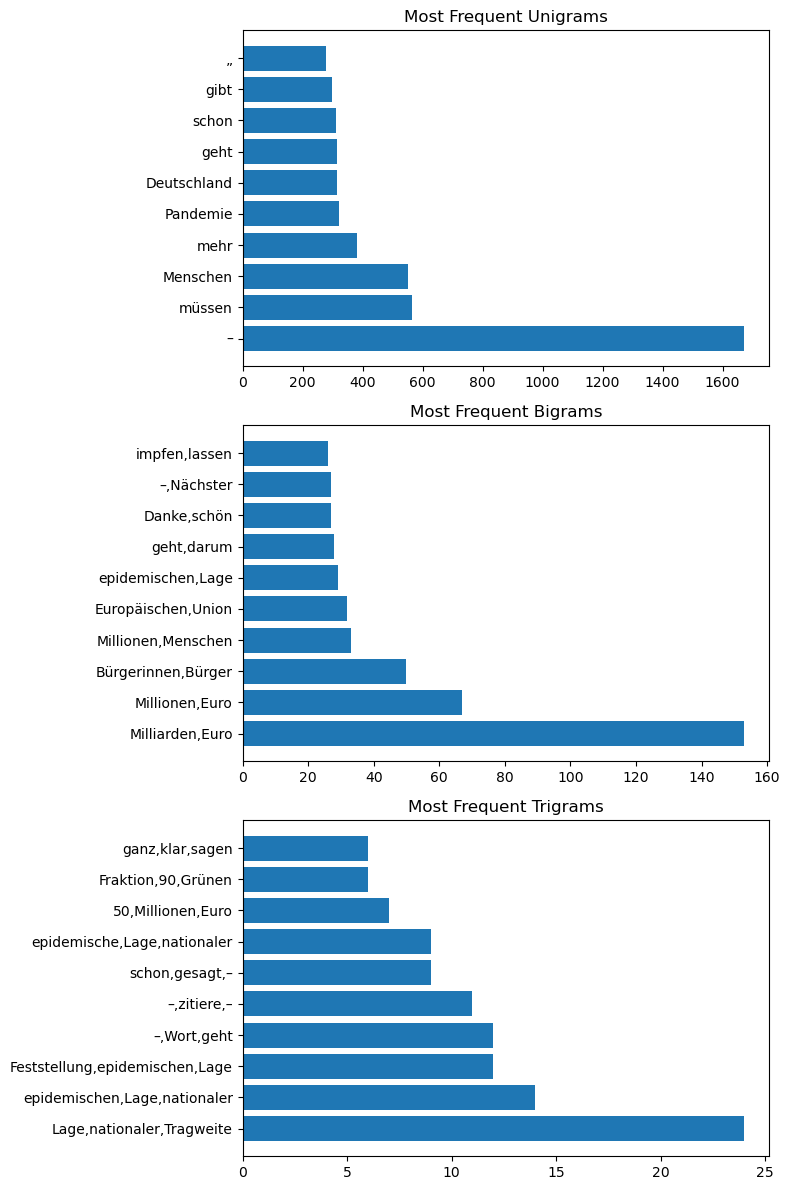

In [24]:
ngram_Stoppwortliste20 = plot_most_frequent_ngrams (merged_sentiment)

In [40]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
#Sentiment_Methods.plot_sentiment_by_party(df_sentiment19)

#Sentiment_Methods.plot_sentiment_by_party(df_sentiment20)

# Filter out rows with the "fraktionslos" party label
filtered_df = merged_sentiment[merged_sentiment['party'] != 'Fraktionslos']

# Call the plot_sentiment_by_party method with the filtered DataFrame
Sentiment_Methods.plot_sentiment_by_party(merged_sentiment)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

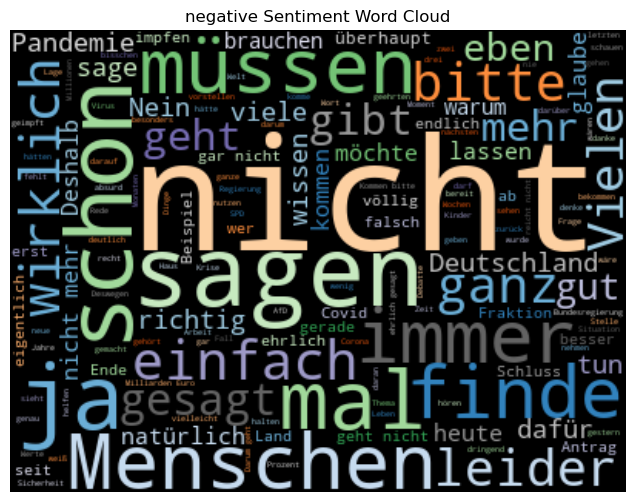

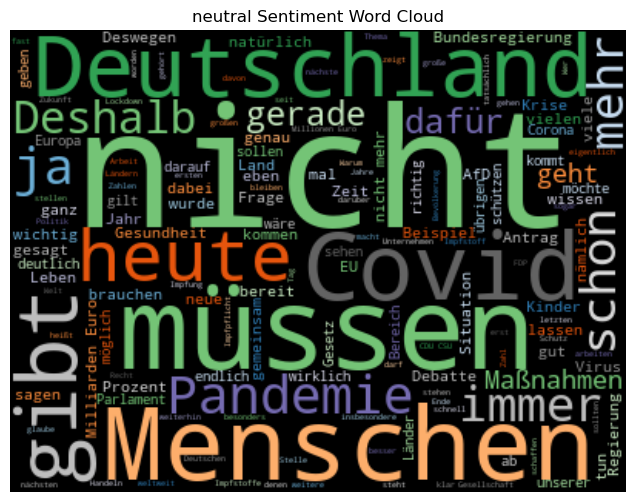

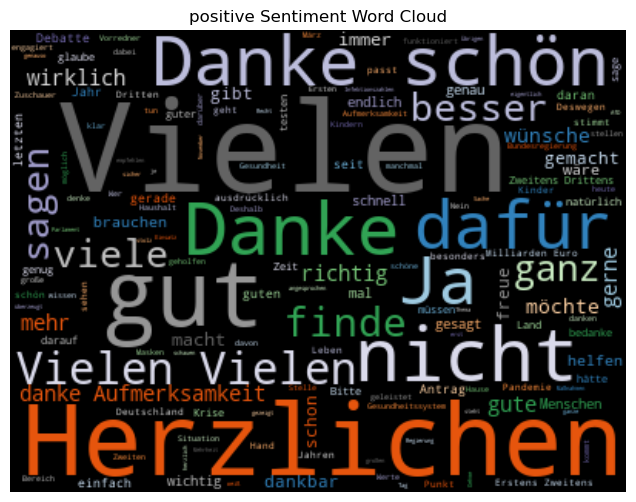

In [41]:
Sentiment_Methods.plot_sentiment_wordclouds (merged_sentiment)

## 3. Weiterführende Analysen

### 3.1 Bestimmung des durchschnittlichen Tagessentiments 

Um fortgeschrittene Analysen wie eine Korrelationsanalyse durchführen zu können, benötigen wir statt der Sentiment-Labels "positiv", "negativ" oder "neutral", die wir durch das germanSentiment Modell erhalten haben, einen Score, der das tägliche Sentiment widerspiegelt. Daher entwickeln wir eine Methode, die basierend auf der eindeutigen ID, die einer Rede an einem bestimmten Tag von einem Politiker/Politikerin zugeordnet ist, diesen Score berechnet. Das bedeutet für unseren Datensatz, dass wir aus den auf Satzebene erhaltenen Sentiment-Werten einen Durchschnittswert über alle Sätze eines Politikers an einem bestimmten Tag bilden.

In [69]:
# Methode zur Berechnung des durchschnittlichen Sentiments pro  Tag/Politiker


def calculate_average_sentiment_score(df):
    """
    Berechnung des durchschnittlichen Sentiments für jede eindeutige 'id' (=Rede eines Politikers) in einem DataFrame.

    Parameter:
        df (pd.DataFrame): Das DataFrame enthält 'date', 'party', 'name', 'id', 'text', 'period', 'sentiment_label'.

    Returns:
        pd.DataFrame: Ein neues DataFrame mit dem durchschnittlichen Stimmungswert für jede 'id'.

    """
    # Sentiment-Label werden in Integer Werte umgerechnet. 
    sentiment_score_map = {
        'positive': 0.0,
        'neutral': 50.0,
        'negative': 100.0       #zur einfacheren Grafischen Visualisierung ist 100 das "schlechteste"
    }

    # Ordne Sentiment-Labels Sentiment-Werten zu.
    df['Sentiment_Score'] = df['Sentiment_Label'].map(sentiment_score_map)

    # Gruppiere das DataFrame nach 'id' und berechne den durchschnittlichen Sentiment-Wert für jede 'id'.
    result_df = merged_sentiment.groupby('id').agg({
        'date': 'first',        # Ursprüngliches 'date' behalten
        'party': 'first',       # Ursprüngliches 'party'behalten
        'name': 'first',        # Ursprüngliches 'name' behalten
        'text': 'first',        # Ursprüngliches 'text' behalten
        'period': 'first',      # Ursprüngliches 'period' behalten
        'Sentiment_Score': 'mean'  # Berechnung des durchschnittlichen Sentiments
    }).reset_index()

    return result_df

# Anwendung auf unseren Merged df, der alle Sentimentwerte aus der 19. & 20. Wahlperiode enthält
result_df = calculate_average_sentiment_score(merged_sentiment)
print(result_df)



               id       date                  party                 name  \
0    ID1914800900 2020-03-04                    FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13                    SPD          Olaf Scholz   
2    ID1915400200 2020-03-25                    AfD    Alexander Gauland   
3    ID1915401300 2020-03-25                CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25                    SPD  Christine Lambrecht   
..            ...        ...                    ...                  ...   
238   ID207703900 2022-12-16  BÜNDNIS 90/DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16                    SPD     Herbert Wollmann   
240   ID207707100 2022-12-16              DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19                    AfD       Christina Baum   
242   ID209400400 2023-03-30                    AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter He

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

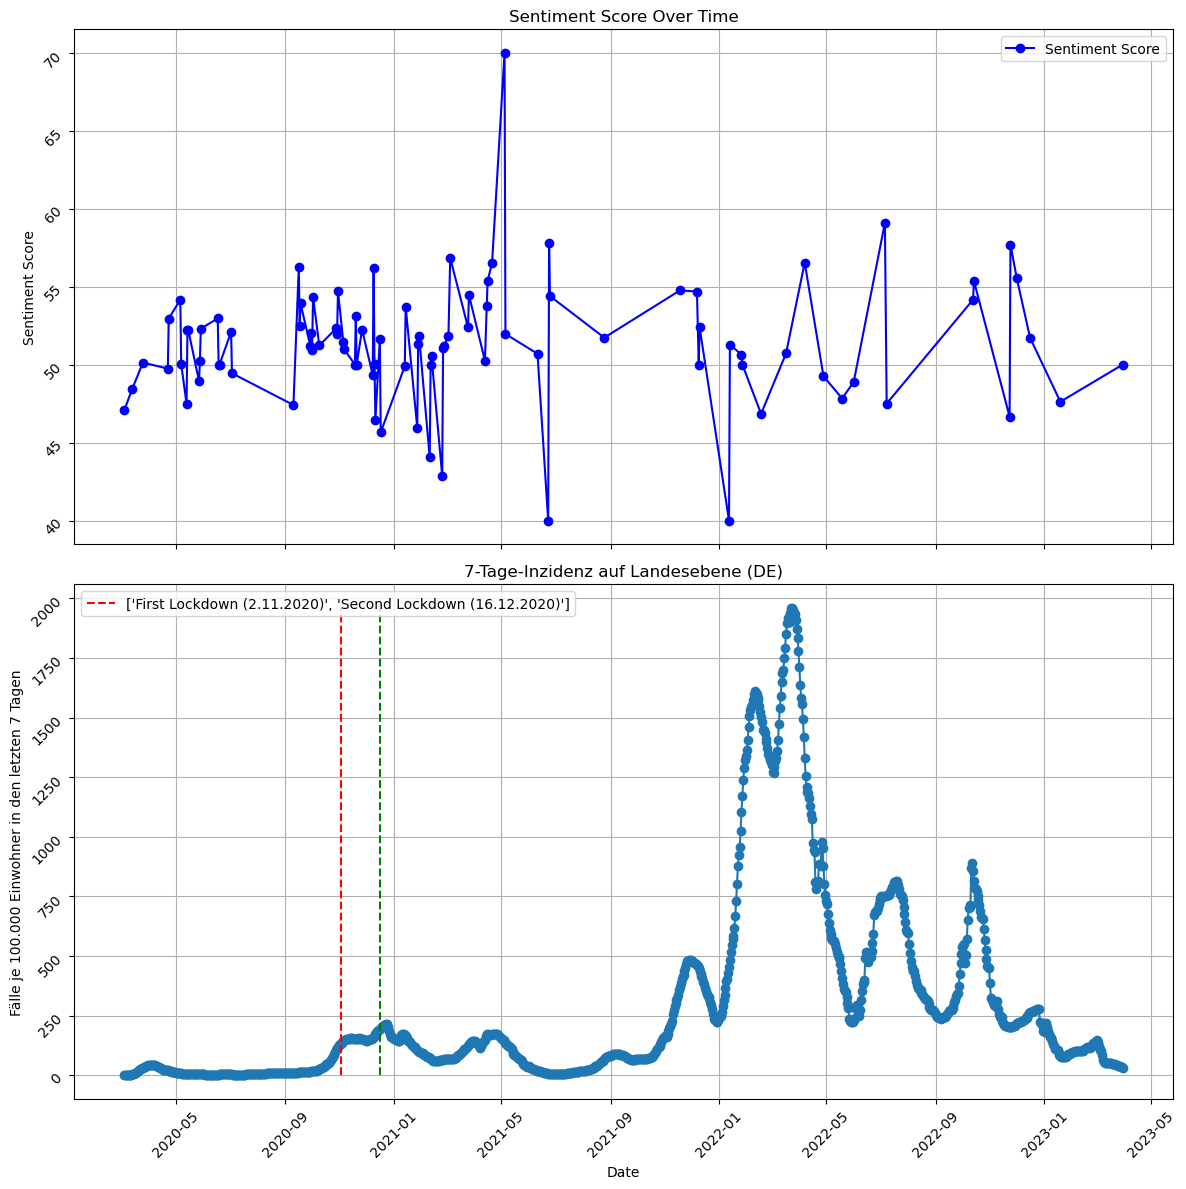

In [71]:
# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Plot the sentiment scores
axs[0].plot(sentiment_scores.index, sentiment_scores, marker='o', linestyle='-', label='Sentiment Score', color='blue')

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time')
axs[0].set_ylabel('Sentiment Score')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Cal

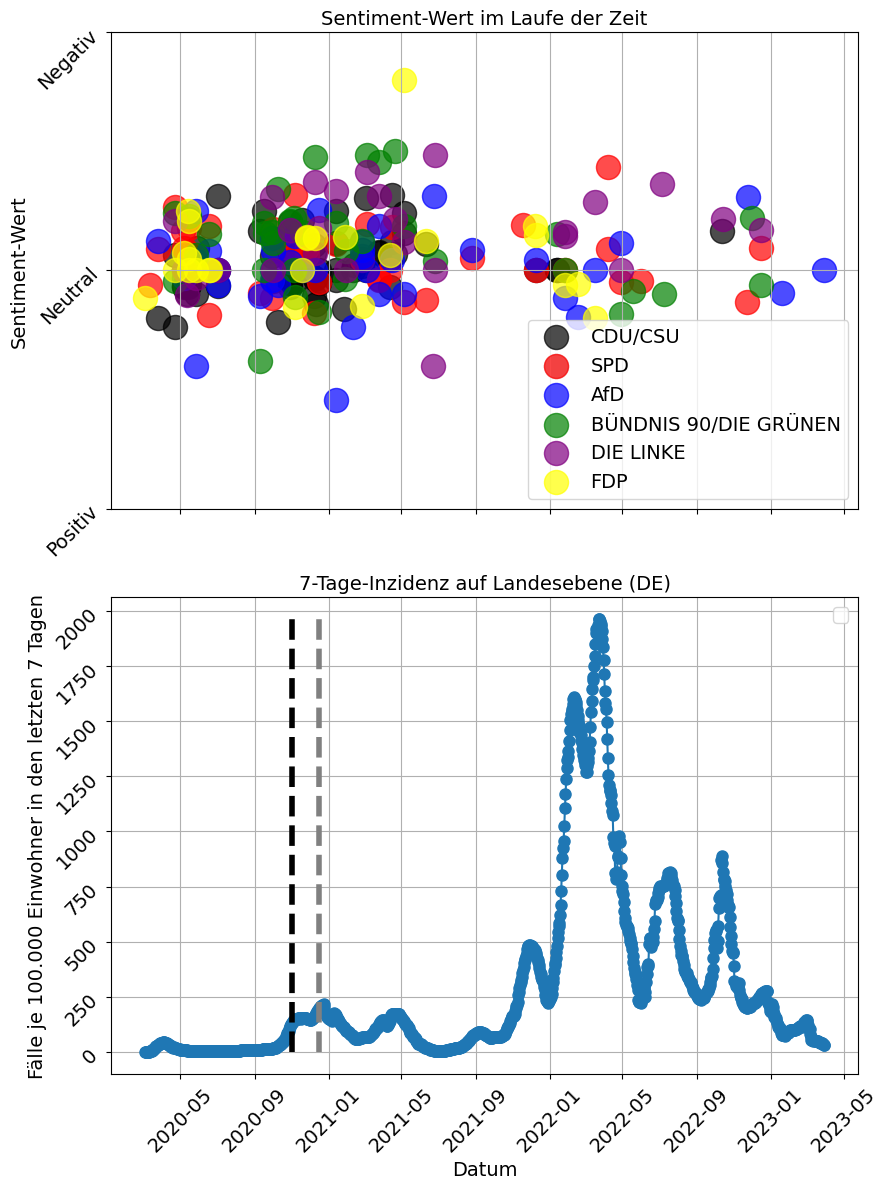

In [83]:
# Erstelle eine Abbildung mit zwei vertikal gestapelten Untergliederungen
fig, axs = plt.subplots(2, 1, figsize=(9, 12), sharex=True)

# Erhöhe die Größe der Bubbles und der grafischen Linien
marker_scaling_factor = 300  # Erhöhe diesen Wert bei Bedarf

# Setze eine größere Schriftgröße
font_size = 14  # Erhöhe diesen Wert bei Bedarf

# Diagramm 1: Sentiment-Verteilung im Laufe der Zeit (Positiv vs. Negativ) mit 'result_df'
# Gruppiere das DataFrame nach 'date' und berechne den durchschnittlichen Sentiment-Wert für jeden Tag
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Konvertiere die gruppierten Sentiment-Werte in ein DataFrame
sentiment_scores_df = sentiment_scores.reset_index()

# Transformiere die Sentiment-Werte in den gewünschten Bereich
transformed_sentiment_scores = 100 - (sentiment_scores * 100)

# Definiere Farben für die Parteien
party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'AfD': 'blue',
    'BÜNDNIS 90/DIE GRÜNEN': 'green',
    'DIE LINKE': 'purple',
    'FDP': 'yellow'
}

# Erstelle den Scatterplot für die Sentiment-Werte mit Parteifarben
for party, color in party_colors.items():
    party_data = result_df[result_df['party'] == party]
    axs[0].scatter(party_data['date'], party_data['Sentiment_Score'],
                   label=party, color=color, alpha=0.7, marker='o', s=marker_scaling_factor)

# Individualisiere das erste Diagramm
axs[0].set_title('Sentiment-Wert im Laufe der Zeit', fontsize=font_size)
axs[0].set_ylabel('Sentiment-Wert', fontsize=font_size)
axs[0].grid(True)
axs[0].tick_params(rotation=45, labelsize=font_size)
axs[0].legend(fontsize=font_size)

# Passe die y-Achse des ersten Diagramms anhand des Sentiment-Wertebereichs an
min_sentiment_score = result_df['Sentiment_Score'].min()
max_sentiment_score = result_df['Sentiment_Score'].max()
axs[0].set_ylim(min_sentiment_score, max_sentiment_score)

# Füge y-Achsenbeschriftungen für das Sentiment hinzu
axs[0].set_yticks([25, 50, 75])
axs[0].set_yticklabels(['Positiv', 'Neutral', 'Negativ'], fontsize=font_size)

# Diagramm 2: 7-Tage-Inzidenz mit 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-', markersize=8)  # Erhöhe die Markierungsgröße

# Füge vertikale Linien für die Lockdown-Daten mit aktualisiertem Stil und Dicke hinzu
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['black', 'grey'], linestyle=['--', '--'], linewidth=4)  # Passe den Linienstil und die Linienbreite an

# Individualisiere das zweite Diagramm
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)', fontsize=font_size)
axs[1].set_xlabel('Datum', fontsize=font_size)
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen', fontsize=font_size)
axs[1].grid(True)
axs[1].tick_params(rotation=45, labelsize=font_size)
axs[1].legend(fontsize=font_size)

# Passe den Abstand zwischen den Untergliederungen an
plt.tight_layout()

# Zeige das kombinierte Diagramm


findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

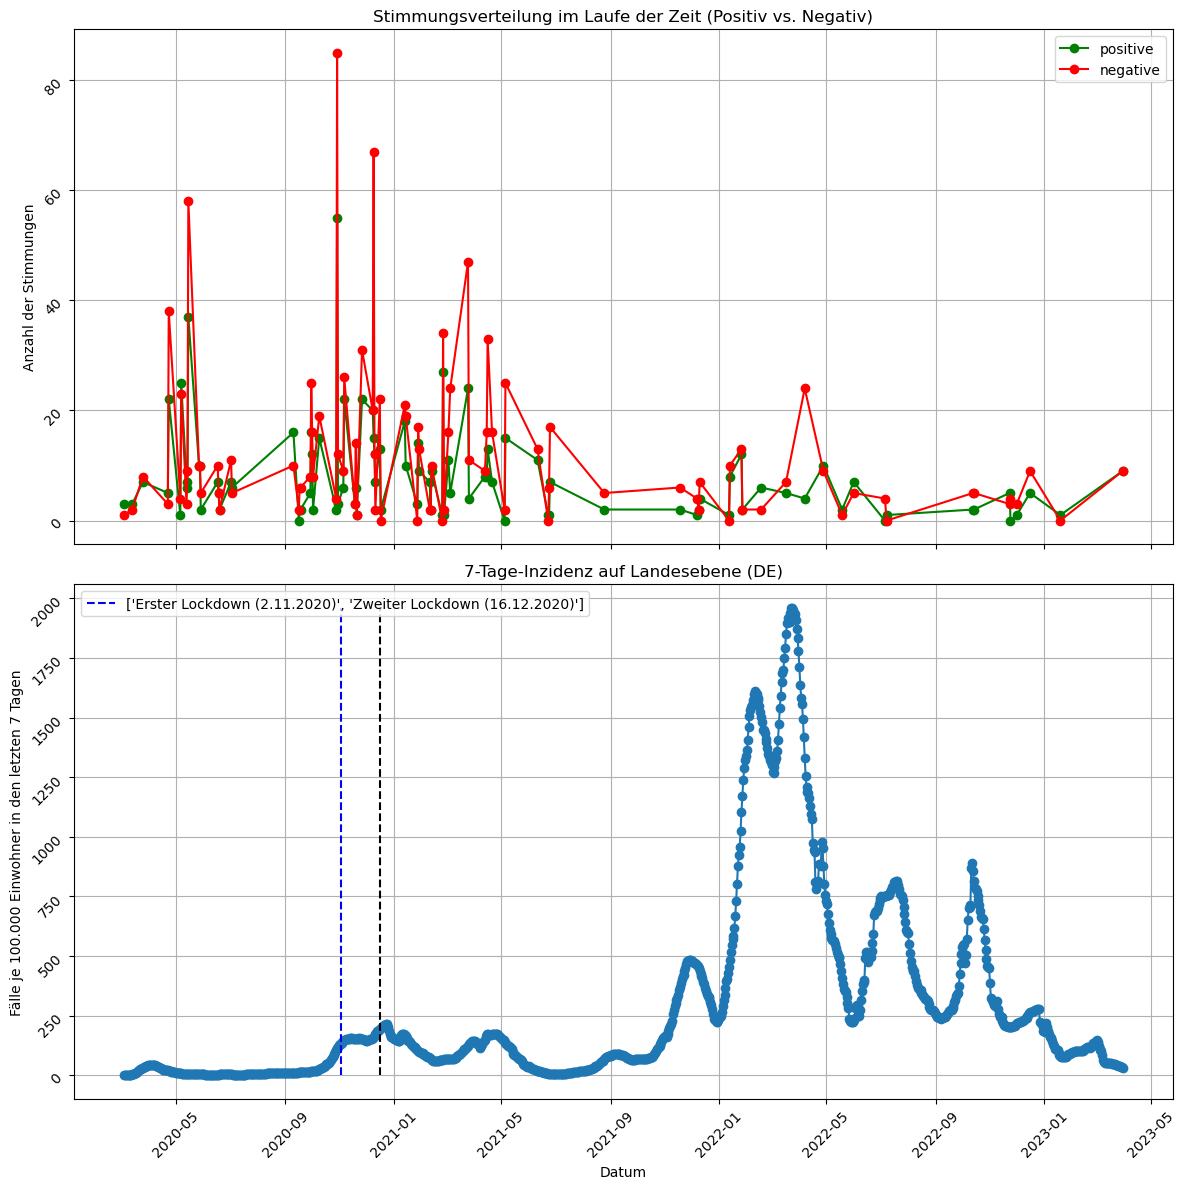

In [79]:
# Erstelle Abbildung mit zwei Diagrammen
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Diagramm 1: Sentiment im Laufe der Zeit (Positiv vs. Negativ)
# Gruppiere das DataFrame nach 'Date' und 'Sentiment', um die Häufigkeit zu zählen
sentiment_counts = merged_sentiment.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_counts_filtered = sentiment_counts[['positive', 'negative']]

# Definiere Farben für die Linien
colors = ['green', 'red']

# Zeichne jedes Sentiment für jeden Tag
for sentiment, color in zip(sentiment_counts_filtered.columns, colors):
    axs[0].plot(sentiment_counts_filtered.index, sentiment_counts_filtered[sentiment], marker='o', linestyle='-', label=sentiment, color=color)

# Layout 1. Diagramm
axs[0].set_title('Stimmungsverteilung im Laufe der Zeit (Positiv vs. Negativ)')
axs[0].set_ylabel('Anzahl der Stimmungen')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Diagramm 2: 7-Tage-Inzidenz
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Konvertiere die Lockdown-Daten in numerisches Format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Füge Linien, zur Kennzeichnung der Lockdown-Daten im Digramm hinzu
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['blue', 'black'], linestyle='--', label=['Erster Lockdown (2.11.2020)', 'Zweiter Lockdown (16.12.2020)'])

# Layout 1. Diagramm
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Datum')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Anpassung des Abstands zwischen den Untergliederungen
plt.tight_layout()

# Zeige das kombinierte Diagramm
plt.show()


In [68]:
start_date = max(merged_sentiment['date'].min(), corona_fallzahlen_gesamt['date'].min())
end_date = min(merged_sentiment['date'].max(), corona_fallzahlen_gesamt['date'].max())

# Filter both DataFrames to the overlapping date range
merged_sentiment = merged_sentiment[(merged_sentiment['date'] >= start_date) & (merged_sentiment['date'] <= end_date)]
corona_fallzahlen_gesamt = corona_fallzahlen_gesamt[
    (corona_fallzahlen_gesamt['date'] >= start_date) & (corona_fallzahlen_gesamt['date'] <= end_date)
]

### 3.2 Korrelationsanalyse

Im nächsten Schritt werden wir mittels einer Korrelationsanalyse untersuchen, ob es einen linearen Zusammenhang zwischen dem Anstieg in der 7 Tages-Inzidenz und dem Verlauf des Sentiments gibt.  

Wir nutzen dafür die Variablen "7-Tages-Inzidenz" und "Fälle neu" aus unserem Corona Gesamtzahlen DataFrame und vergleichen die Werte mit unserem Datafram SentimentScore, welches die durchschnittlichen Sentimentwerte für 92 Tage wiederspiegelt. 

In [84]:
# Wir wollen nur die Corona Fallzahlen haben, für die Daten für die wir auch den Sentiment Score bestimmt haben
corr_df = sentiment_scores_df.merge(corona_fallzahlen_gesamt, on='date', how='inner')

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

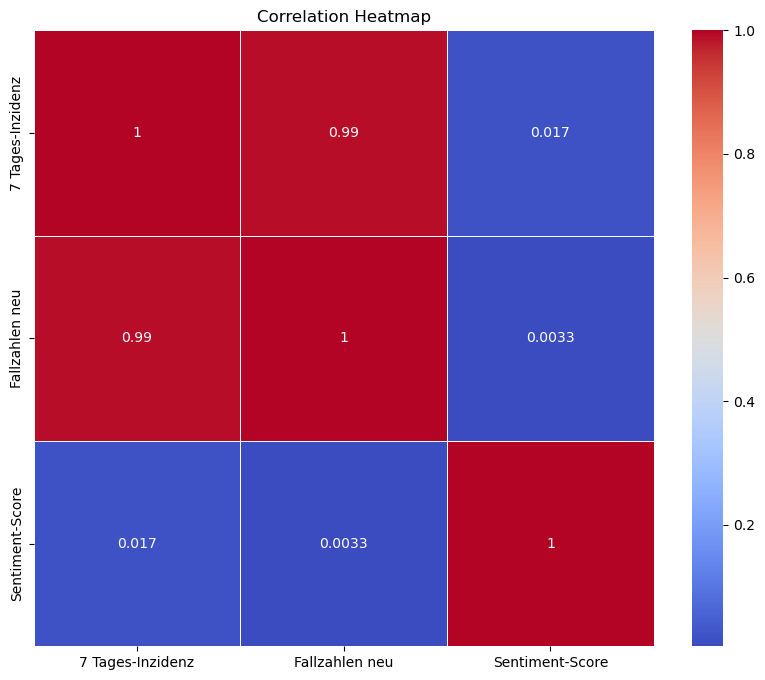

In [89]:
import seaborn as sns

# Sample data (replace this with your own dataset)
# Create a sample DataFrame with random data for demonstration

data_corr = pd.DataFrame({
    '7 Tages-Inzidenz': corr_df["Inzidenz_7-Tage"] ,
    'Fallzahlen neu': corr_df["Faelle_neu"] ,
    'Sentiment-Score': corr_df["Sentiment_Score"]
  
})

# Compute the correlation matrix
corr_matrix = data_corr.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### 3.3 Topic Analyse

In [55]:
from transformers import pipeline

# Load the text classification pipeline
pipeline_classification_topics = pipeline("text-classification", model="chkla/parlbert-topic-german", return_all_scores=False)

# Assuming you have a DataFrame 'result_df' with a 'text' column
# Extract the text data from the DataFrame
texts_to_classify = result_df['text']

# Initialize an empty list to store the classification results
classification_results = []

# Set a maximum token length for the model
max_token_length = 512  # Adjust this value based on your model's maximum token limit

# Iterate through the text entries and classify them
for text in texts_to_classify:
    # Split the long text into segments that fit within the model's token limit
    segments = [text[i:i+max_token_length] for i in range(0, len(text), max_token_length)]
    
    # Classify each segment separately
    segment_results = [pipeline_classification_topics(segment) for segment in segments]
    
    # Combine the results from all segments (you can customize how you combine them)
    combined_result = {
        'topic': [result[0]['label'] for result in segment_results],
        'probability': [result[0]['score'] for result in segment_results],
    }
    
    # Append the combined result to the list
    classification_results.append(combined_result)

# Create a new DataFrame to store the classification results
topic_df = pd.DataFrame(classification_results)

# Assuming your classification_df has columns like 'label' and 'score' for the classification results
print(topic_df)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/transformers/pipelines/text_cl

                                                 topic  \
0    [Technology, Health, Health, Health, Health, H...   
1    [Health, Government, Labor, Labor, Government,...   
2    [Government, Domestic, Health, Domestic, Macro...   
3    [Health, Government, Government, Law, Law, Dom...   
4    [Government, Health, Domestic, Law, Government...   
..                                                 ...   
238  [Civil, Health, Health, Health, Health, Health...   
239  [Civil, Civil, Health, Health, Health, Health,...   
240  [Health, Health, Health, Health, Health, Healt...   
241   [Health, Health, Health, Health, Health, Health]   
242  [Social, Social, Government, Domestic, Domesti...   

                                           probability  
0    [0.8730884194374084, 0.9958589673042297, 0.997...  
1    [0.9990963935852051, 0.9961317777633667, 0.977...  
2    [0.9381905794143677, 0.9774143695831299, 0.998...  
3    [0.5196781754493713, 0.8637508153915405, 0.987...  
4    [0.5442996025

In [93]:
# Merge classification_df with result_df using the index and keeping all columns of result_df
topic_df = result_df.merge(topic_df, left_index=True, right_index=True)

# Now merged_sentiment contains all columns from result_df and the classification results
print(topic_df)


               id       date                  party                 name  \
0    ID1914800900 2020-03-04                    FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13                    SPD          Olaf Scholz   
2    ID1915400200 2020-03-25                    AfD    Alexander Gauland   
3    ID1915401300 2020-03-25                CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25                    SPD  Christine Lambrecht   
..            ...        ...                    ...                  ...   
238   ID207703900 2022-12-16  BÜNDNIS 90/DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16                    SPD     Herbert Wollmann   
240   ID207707100 2022-12-16              DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19                    AfD       Christina Baum   
242   ID209400400 2023-03-30                    AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter He

In [137]:
# Assuming 'topic_df' is your DataFrame with 'ID' and 'topic' columns where 'topic' is a list of topics
# Create a new DataFrame with all original columns and a simplified 'topic' column
unique_topic_df = pd.DataFrame()

# Copy all columns except 'topic'
unique_topic_df = topic_df.drop(columns=['topic'])

# Add the simplified 'topic' column
unique_topic_df['topic'] = topic_df['topic'].apply(lambda x: list(set(x)))

# Übersetze alle Topics ins Deutsche
# Define a translation dictionary for the topics
topic_translation = {
    'Labor': 'Arbeit',
    'Government': 'Regierung',
    'Health': 'Gesundheit',
    'International': 'International',
        'Technology': 'Technologie',
        'Domestic': 'Haushalt',
        'Agriculture':'Landwirtschaft',
        'Macroeconomics':'Volkswirtschaft',
        'Law':'Gesetzgebung',
        'Housing':'Haushalt',
        'Social':'Soziales',
        'Education':'Bildung',
        'Civil':'Bürger',
        'Foreign':'Ausländisches',
        'Defense':'Verteidigung',
        'Energy':'Energie',
        'Public':'Öffentliches',
        'Environment': 'Umwelt',
        'Immigration':'Einwanderung',
        'Transportation':'Verkehr',
        'Culture':'Kultur'

}

# Translate the 'topic' column using the translation dictionary
unique_topic_df['topic'] = unique_topic_df['topic'].apply(lambda topics: [topic_translation[topic] for topic in topics])

# Now, the 'topic' column contains translated topics in German


# Löschen der Probability Variable, da diese keine Bedeutung mehr hat 
unique_topic_df.drop (["probability"], axis=1)


id       date                  party                 name  \
0    ID1914800900 2020-03-04                    FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13                    SPD          Olaf Scholz   
2    ID1915400200 2020-03-25                    AfD    Alexander Gauland   
3    ID1915401300 2020-03-25                CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25                    SPD  Christine Lambrecht   
..            ...        ...                    ...                  ...   
238   ID207703900 2022-12-16  BÜNDNIS 90/DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16                    SPD     Herbert Wollmann   
240   ID207707100 2022-12-16              DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19                    AfD       Christina Baum   
242   ID209400400 2023-03-30                    AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter Herr Präsident! Liebe Kolleginne...      19   
1    Sehr geehrter Herr Präsident! Meine Damen und ...      19   
2    Herr Präsident! Meine Damen und Herren! Zuerst...      19   
3    Herr Präsident! Liebe Kolleginnen und Kollegen...      19   
4    Herr Präsident! Meine sehr geehrten Damen und ...      19   
..                                                 ...     ...   
238  Sehr geehrte Frau Präsidentin! Liebe Kolleginn...      18   
239  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...      18   
240  Sehr geehrte Frau Präsidentin! Kolleginnen und...      18   
241  Frau Präsidentin! Meine Damen und Herren! Von ...      18   
242  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...      18   

     Sentiment_Score                                              topic  
0          47.058824                          [Technologie, Gesundheit]  
1          48.437500     [Arbeit, Regierung, Gesundheit, International]  
2          53.125000  [International, Haushalt, Volkswirtschaft, Reg...  
3          45.000000  [Gesetzgebung, Haushalt, Regierung, Haushalt, ...  
4          52.272727  [Soziales, Gesetzgebung, Haushalt, Regierung, ...  
..               ...                                                ...  
238        48.484848                               [Bürger, Gesundheit]  
239        52.380952                               [Bürger, Gesundheit]  
240        54.285714                            [Regierung, Gesundheit]  
241        47.619048                                       [Gesundheit]  
242        50.000000        [Gesundheit, Regierung, Haushalt, Soziales]  

[243 rows x 8 columns]

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

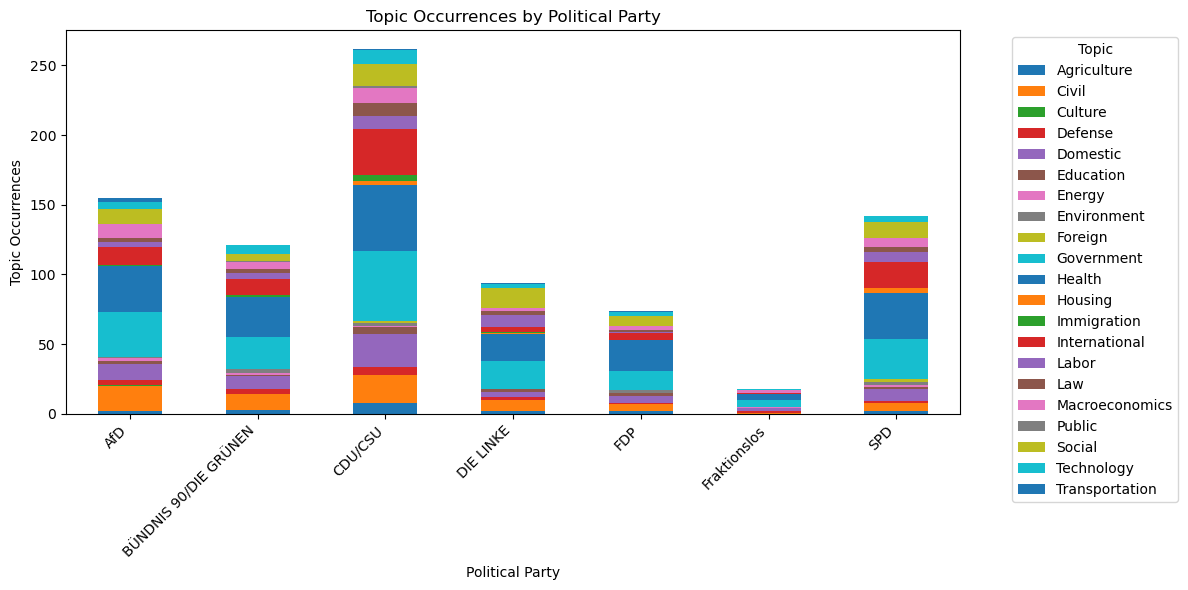

In [110]:

def visualize_topic_occurrences_by_party(topic_df):
    """
    Visualize the occurrence of topics by political party.

    Args:
        topic_df (pd.DataFrame): DataFrame containing data with columns 'party' and 'label'.

    Returns:
        None
    """
    # Flatten the 'label' column, which contains lists of topics
    topic_df = topic_df.explode('topic')
    
    # Group by party and topic, then count occurrences
    topic_counts = topic_df.groupby(['party', 'topic']).size().unstack(fill_value=0)
    
    # Plot the data as a bar chart
    topic_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
    
    # Customize the plot
    plt.title('Topic Occurrences by Political Party')
    plt.xlabel('Political Party')
    plt.ylabel('Topic Occurrences')
    plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_topic_occurrences_by_party(unique_topic_df)


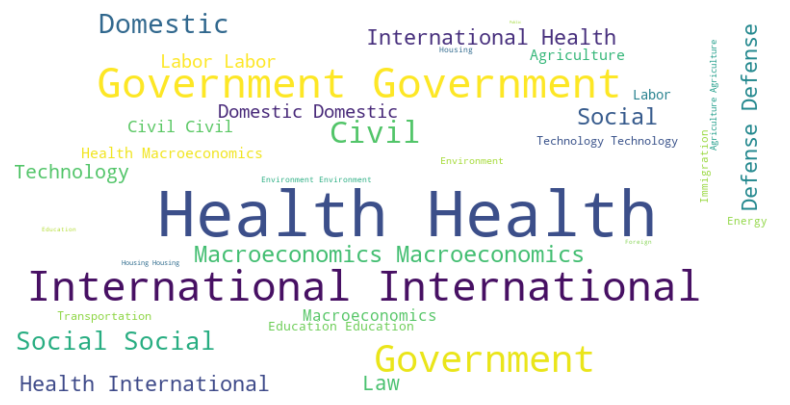

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(topic_labels):
    """
    Generate and display a word cloud from a list of topic labels.

    Args:
        topic_labels (list): List of topic labels.

    Returns:
        None
    """
    # Combine all topic labels into a single string
    topic_text = " ".join(topic_labels)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

topic_labels = topic_df['topic'].explode().tolist()  # Explode the list of lists into a flat list
generate_wordcloud(topic_labels)

In [ ]:
def count_topic_mentions(classification_df, target_topic_label):
    """
    Count how often a specific topic is mentioned in the classification results DataFrame.

    Args:
        classification_df (pd.DataFrame): DataFrame containing classification results.
        target_topic_label (str): The label of the topic you want to count mentions of.

    Returns:
        int: The count of mentions of the target topic label.
    """
    # Count occurrences of the target topic label in the 'label' column
    topic_mentions_count = (classification_df['label'] == target_topic_label).sum()
    
    return topic_mentions_count

# Example usage:
target_topic_label = 'your_target_topic_label'  # Replace with the actual label you want to count
mentions_count = count_topic_mentions(classification_df, target_topic_label)
print(f"The topic '{target_topic_label}' is mentioned {mentions_count} times.")



def visualize_topic_occurrences_pie_chart(topic_counts_df):
    """
    Visualize topic occurrences in a pie chart.

    Args:
        topic_counts_df (pd.DataFrame): DataFrame with topics and their counts.

    Returns:
        None
    """
    # Extract topics and their corresponding counts
    topics = topic_counts_df['Topic']
    counts = topic_counts_df['Count']
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set chart title
    plt.title('Topic Occurrences')

    # Display the pie chart
    plt.show()

# Example usage:
visualize_topic_occurrences_pie_chart(topic_counts_df)


NameError: name 'classification_df' is not defined

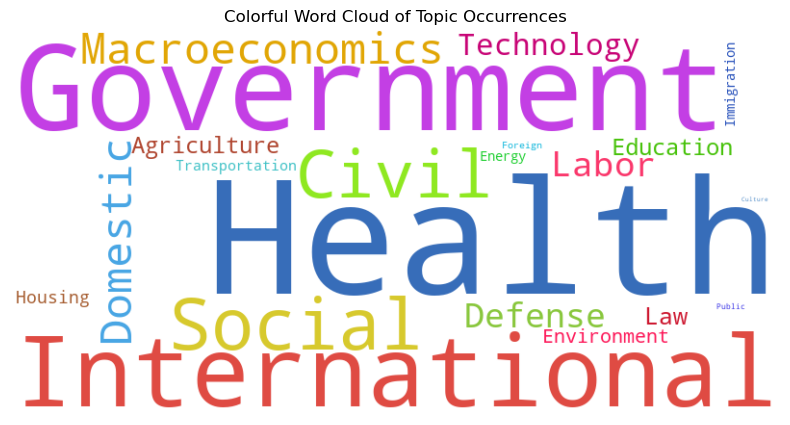

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Custom color function
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    import random
    h = random.randint(0, 360)  # Random hue value for a different color
    s = random.randint(50, 100)  # Random saturation for vibrant colors
    l = random.randint(40, 60)  # Random lightness for a balanced appearance
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Convert the topic counts DataFrame into a dictionary
topic_counts_dict = dict(zip(topic_counts_df['Topic'], topic_counts_df['Count']))

# Generate a word cloud with the custom color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=random_color_func).generate_from_frequencies(topic_counts_dict)

# Create a figure for the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Colorful Word Cloud of Topic Occurrences')

# Display the word cloud
plt.show()



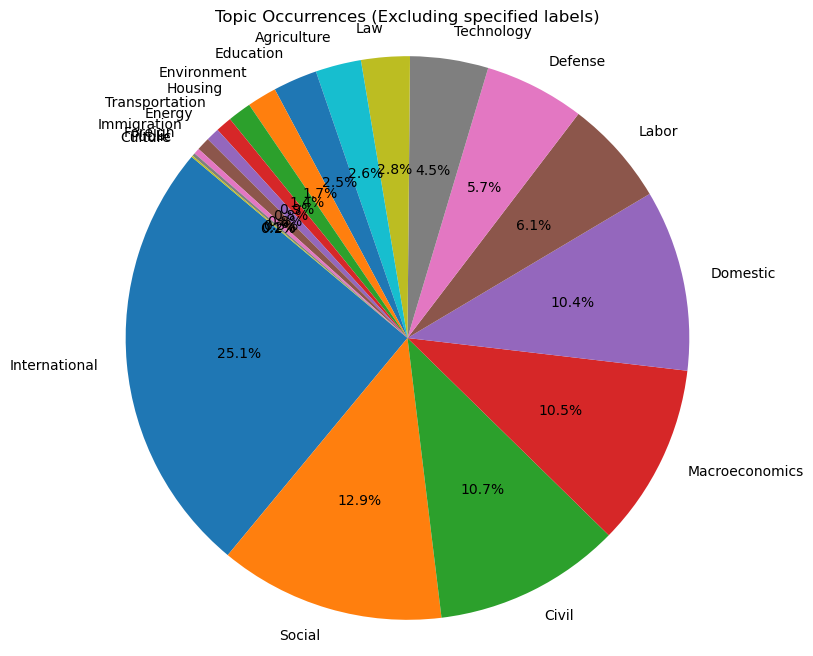

In [ ]:
import matplotlib.pyplot as plt

def visualize_topic_occurrences_pie_chart(topic_counts_df, excluded_labels=[]):
    """
    Visualize topic occurrences in a pie chart, excluding specified labels.

    Args:
        topic_counts_df (pd.DataFrame): DataFrame with topics and their counts.
        excluded_labels (list): List of labels to exclude from the pie chart.

    Returns:
        None
    """
    # Filter out excluded labels from the DataFrame
    filtered_df = topic_counts_df[~topic_counts_df['Topic'].isin(excluded_labels)]
    
    # Extract topics and their corresponding counts
    topics = filtered_df['Topic']
    counts = filtered_df['Count']
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set chart title
    plt.title('Topic Occurrences (Excluding specified labels)')

    # Display the pie chart
    plt.show()

# Example usage:
excluded_labels = ['Health', 'Government']  # Specify labels to exclude
visualize_topic_occurrences_pie_chart(topic_counts_df, excluded_labels)


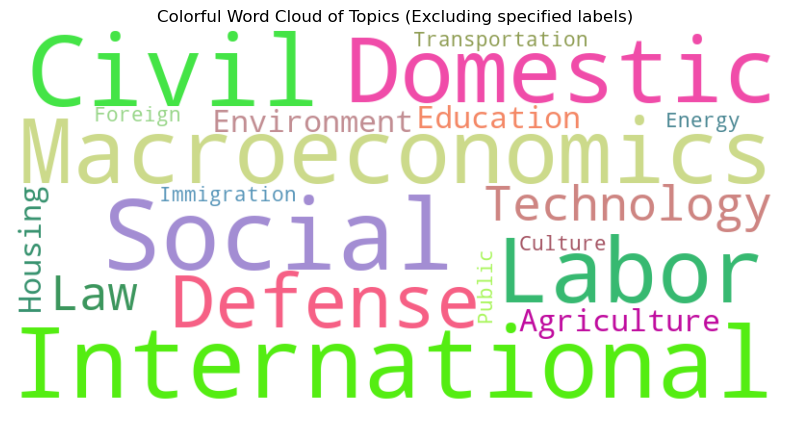

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Custom color function for word cloud
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    # Generate a random color
    return "hsl({}, {}%, {}%)".format(random.randint(0, 360), random.randint(30, 90), random.randint(40, 70))

# Assuming you have a DataFrame 'topic_counts_df' with the column 'Topic'
# Extract the relevant text data for word cloud generation, excluding the excluded labels
excluded_labels = ['Health', 'Government']  # Specify labels to exclude
filtered_df = topic_counts_df[~topic_counts_df['Topic'].isin(excluded_labels)]
text_data = ' '.join(filtered_df['Topic'])

# Create a WordCloud object with the custom color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=random_color_func).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Colorful Word Cloud of Topics (Excluding specified labels)')
plt.show()


## 4. Fazit